In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys; sys.path.append('..')
import random, math
import pyzx as zx
from fractions import Fraction
from pyzx.phasepoly import circuit_phase_polynomial_blocks, optimize_block
%config InlineBackend.figure_format = 'svg'
zx.quantomatic.quantomatic_location = r'C:\Users\John\Desktop\scala.jar'

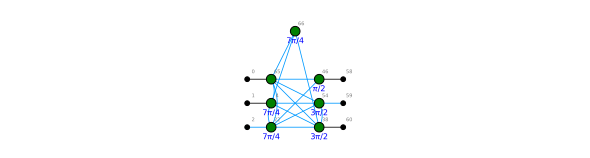

In [3]:
#g = zx.generate.identity(1,2)
#g = zx.quantomatic.edit_graph(g)
g = zx.generate.cliffordT(3,40, p_t=0.2)
zx.simplify.full_reduce(g,quiet=True)
g.normalise()
zx.draw(g,labels=True)

In [4]:
g2 = g.copy()
zx.simplify.to_rg(g2)
zx.quantomatic.edit_graph(g2)

Opening Quantomatic...
Done


Graph(13 vertices, 21 edges)

In [10]:
def generate_parities(targets):
    parities = set()
    for i in range(4):
        a = targets[i]
        parities.add(frozenset([a]))
        for j in range(i+1,4):
            b = targets[j]
            parities.add(frozenset([a,b]))
            for k in range(j+1,4):
                c = targets[k]
                parities.add(frozenset([a,b,c]))
                for l in range(k+1,4):
                    d = targets[l]
                    parities.add(frozenset([a,b,c,d]))
    return parities

s1 = generate_parities([1,2,3,4])
s2 = generate_parities([2,3,4,5])
s3 = generate_parities([1,2,3,5])
#s5 = generate_parities([1,2,3,5])
s1.symmetric_difference(s2).symmetric_difference(s3)#.symmetric_difference(s4))#.symmetric_difference(s5)

{frozenset({1, 2, 3, 4}),
 frozenset({1, 5}),
 frozenset({1, 2, 3, 5}),
 frozenset({1, 2, 4}),
 frozenset({3}),
 frozenset({1, 3, 4}),
 frozenset({4, 5}),
 frozenset({3, 4, 5}),
 frozenset({2, 3, 4, 5}),
 frozenset({1, 3, 5}),
 frozenset({1, 4}),
 frozenset({2}),
 frozenset({1, 2, 5}),
 frozenset({2, 3}),
 frozenset({2, 4, 5})}

alpha = 1/4   beta = 1/4


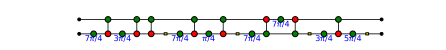

alpha = 1/4   beta = 3/4


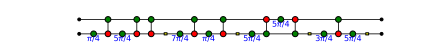

alpha = 1/4   beta = 5/4


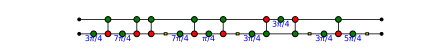

alpha = 1/4   beta = 7/4


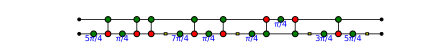

alpha = 3/4   beta = 1/4


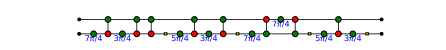

alpha = 3/4   beta = 3/4


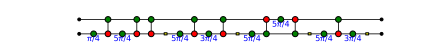

alpha = 3/4   beta = 5/4


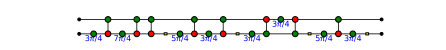

alpha = 3/4   beta = 7/4


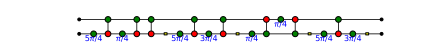

alpha = 5/4   beta = 1/4


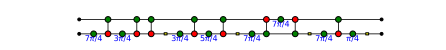

alpha = 5/4   beta = 3/4


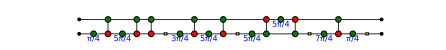

alpha = 5/4   beta = 5/4


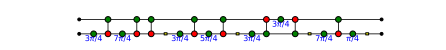

alpha = 5/4   beta = 7/4


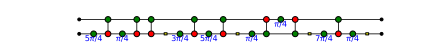

alpha = 7/4   beta = 1/4


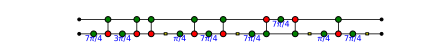

alpha = 7/4   beta = 3/4


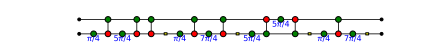

alpha = 7/4   beta = 5/4


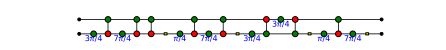

alpha = 7/4   beta = 7/4


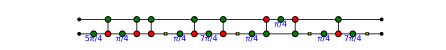

In [29]:
def generate_identity(alpha, beta):
    cb = zx.Circuit(2)
    cb.add_gate("NOT",0)
    cb.add_gate("ZPhase",0,beta)
    cb.add_gate("ZPhase",1,beta)
    cb.add_gate("ParityPhase", -beta, 0, 1)
    cb.add_gate("NOT",0)

    ca = zx.Circuit(2)
    ca.add_gate("ZPhase", 1, Fraction(3,2))
    ca.add_gate("XPhase", 1, Fraction(3,2))
    ca.add_gate("ZPhase",0,alpha)
    ca.add_gate("ZPhase",1,alpha)
    ca.add_gate("ParityPhase", -alpha, 0, 1)
    ca.add_gate("XPhase", 1, Fraction(1,2))
    ca.add_gate("ZPhase", 1, Fraction(1,2))

    c = cb.copy()
    c.add_circuit(ca)
    c.add_circuit(cb.adjoint())
    c.add_circuit(ca.adjoint())
    return c

for i in range(1,8,2):
    alpha = Fraction(i,4)
    for j in range(1,8,2):
        beta = Fraction(j,4)
        c = generate_identity(alpha, beta)
        g = c.to_graph()
        zx.simplify.full_reduce(g)
        g2 = g.copy()
        c2 = zx.extract.streaming_extract(g2)
        c3, blocks = circuit_phase_polynomial_blocks(c2.to_basic_gates(),optimize=True)
        #c4, blocks = circuit_phase_polynomial_blocks(c3,optimize=True)
        g = c3.to_graph()
        zx.simplify.id_simp(g,quiet=True)
        print("alpha =",alpha, "  beta =", beta)
        display(zx.draw(g,h_edge_draw='box',figsize=(6,0.5)))
        #zx.simplify.gadgetize(g)
        #edges = [(49,55),(55,49),(59,65),(65,59)]
        #zx.simplify.pivot_simp(g,matchf=lambda e: e in edges, quiet=True)
        #print(alpha, beta, [g.phase(v).numerator for v in g.vertices() if g.phase(v) != 0 and g.phase(v).denominator!=1])
        

#zx.draw(c)

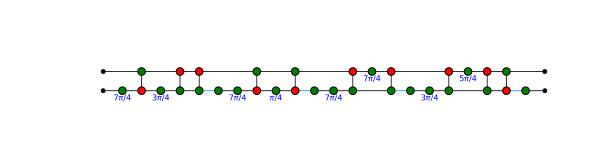

In [5]:
g = zx.generate.circuit_identity_commuting_controls(Fraction(1,4),Fraction(1,4))
zx.simplify.full_reduce(g)
c = zx.extract.streaming_extract(g).to_basic_gates()
c2, blocks = circuit_phase_polynomial_blocks(c,optimize=True)
c3, blocks = circuit_phase_polynomial_blocks(c2,optimize=True)
zx.draw(c3)

[]


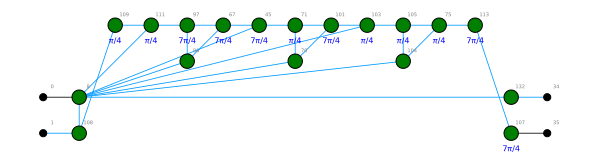

In [39]:
#c = generate_identity(Fraction(5,4),Fraction(7,4))
g = c.to_graph()
zx.simplify.full_reduce(g)
zx.simplify.full_reduce(g)
# zx.simplify.gadgetize(g)
# edges = [(49,55),(55,49),(59,65),(65,59)]
# zx.simplify.pivot_simp(g,matchf=lambda e: e in edges)
# zx.simplify.id_simp(g)
m = zx.rules.match_gadgets_phasepoly(g)
print(m)
#print(alpha, beta, [g.phase(v).numerator for v in g.vertices() if g.phase(v) != 0 and g.phase(v).denominator!=1])
#zx.gadget_simp(g)
# zx.simplify.id_simp(g)
#zx.full_reduce(g)
g.normalise()
zx.draw(g,labels=True)

In [35]:
zx.compare_tensors(g.to_tensor(), zx.generate.identity(2).to_tensor())

True

In [31]:
zx.quantomatic.edit_graph(g)

Opening Quantomatic...
Done


Graph(18 vertices, 23 edges)

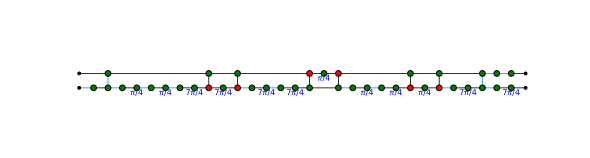

In [36]:
g2 = g.copy()
c2 = zx.extract.streaming_extract(g2)
zx.draw(c2.to_graph())

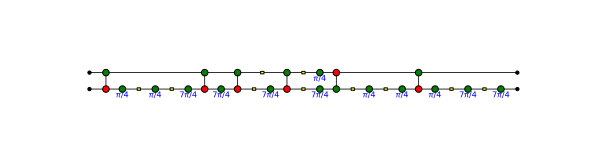

In [37]:
c3, blocks = circuit_phase_polynomial_blocks(c2.to_basic_gates(),optimize=True)
c4, blocks = circuit_phase_polynomial_blocks(c3,optimize=True)
g = c4.to_graph()
zx.simplify.id_simp(g,quiet=True)
zx.draw(g,h_edge_draw='box')

In [42]:
zx.compare_tensors(c4,zx.identity(2))

True

In [156]:
g = zx.generate.identity(1,3)
g = zx.quantomatic.edit_graph(g)

Opening Quantomatic...
Done


In [21]:
a = zx.Circuit(2)
a.add_gate("CZ",0,1)
a.add_gate("CNOT",0,1)
b = zx.Circuit(2)
b.add_gate("S",0)
b.add_gate("S",1)
b.add_gate("CNOT",0,1)
b.add_gate("S",1, adjoint=True)
zx.compare_tensors(a,b)

True

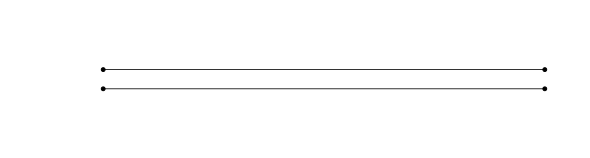

In [7]:
alpha = Fraction(3,5)
beta= Fraction(5,7)

c = zx.Circuit(2)
c.add_gate("XPhase", 1, alpha)
c.add_gate("ZPhase", 1, beta)
c.add_gate("XPhase", 1, alpha)
c.add_gate("NOT", 0)
c.add_gate("NOT", 1)
c.add_gate("CNOT",0,1)
c.add_gate("XPhase", 1, -alpha)
c.add_gate("NOT", 1)
c.add_gate("ZPhase", 1, -beta)
c.add_gate("XPhase", 1, -alpha)
c.add_gate("CNOT",0,1)
c.add_gate("NOT", 0)
c.add_gate("NOT", 1)
c.add_circuit(c)
g = c.to_graph()
zx.full_reduce(g)
zx.draw(g)